In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import re

pd.set_option('display.float_format', '{:,.0f}'.format)

In [8]:
dfRaw = pd.read_csv('commodity_trade_statistics_data.csv')
dfRaw.head()

/var/folders/tp/91my4k8n68z60sh31dbxcf1r0000gn/T/ipykernel_7302/987036192.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dfRaw = pd.read_csv('commodity_trade_statistics_data.csv')


,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,"2,339",Number of items,51,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984,Number of items,53,01_live_animals
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272,Number of items,"3,769",01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,"1,114,023",Number of items,"6,853",01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,"9,484,953",Number of items,"96,040",01_live_animals


# START CIGAR

In [16]:
dfCigar = dfRaw[(dfRaw['commodity'] == 'Cigarettes containing tobacco') & (dfRaw['flow'] == 'Export') & (dfRaw['country_or_area'].isin(['Indonesia','Malaysia','Thailand']))]
dfCigar = dfCigar.drop(dfCigar[dfCigar['weight_kg']==0].index)
dfCigar.dropna(inplace=True)
dfCigar.reset_index(inplace=True,drop=True)
dfCigar['trade_usd'] = dfCigar['trade_usd'].astype(float)
dfCigar.head()

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Indonesia,2016,240220,Cigarettes containing tobacco,Export,"738,278,915","77,482,446",Weight in kilograms,"77,482,446",24_tobacco_and_manufactured_tobacco_substitutes
1,Indonesia,2015,240220,Cigarettes containing tobacco,Export,"730,893,432","75,183,646",Weight in kilograms,"75,183,646",24_tobacco_and_manufactured_tobacco_substitutes
2,Indonesia,2014,240220,Cigarettes containing tobacco,Export,"765,845,361","75,818,736",Weight in kilograms,"75,818,736",24_tobacco_and_manufactured_tobacco_substitutes
3,Indonesia,2013,240220,Cigarettes containing tobacco,Export,"665,962,696","68,377,413",Weight in kilograms,"68,377,413",24_tobacco_and_manufactured_tobacco_substitutes
4,Indonesia,2012,240220,Cigarettes containing tobacco,Export,"580,086,244","61,534,101",Weight in kilograms,"61,534,101",24_tobacco_and_manufactured_tobacco_substitutes


In [17]:
dfCigar[['trade_usd','weight_kg']].corr()

,trade_usd,weight_kg
trade_usd,1,1
weight_kg,1,1


In [18]:
dfCigar[['trade_usd','weight_kg']].describe()

,trade_usd,weight_kg
count,82,82
mean,"137,433,002","16,771,934"
std,"176,778,900","20,492,730"
min,"18,235","1,090"
25%,"11,510,910","775,520"
50%,"101,585,946","8,784,596"
75%,"170,505,550","23,898,389"
max,"765,845,361","77,482,446"


In [19]:
cigarPrice_reg = sm.OLS(dfCigar['trade_usd'], sm.add_constant(dfCigar[['weight_kg']]))
hasil = cigarPrice_reg.fit()
print(hasil.summary())

                            OLS Regression Results                            
Dep. Variable:              trade_usd   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     440.3
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           2.86e-34
Time:                        14:29:31   Log-Likelihood:                -1596.3
No. Observations:                  82   AIC:                             3197.
Df Residuals:                      80   BIC:                             3201.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.337e+06   9.98e+06      0.435      0.6

In [20]:
def trade_usd_predict(x):
    y = -1.969e+08  + (11.8279*(x))
    return y

In [21]:
tempList = []
for i in range(len(dfCigar)):
    tempList.append(trade_usd_predict(dfCigar['weight_kg'][i]))

dfCigar.insert(7,'Predicted Trade USD',tempList)
dfCigar.insert(8,'Selisih',(dfCigar['trade_usd']-dfCigar['Predicted Trade USD']))
dfCigar

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,Predicted Trade USD,Selisih,quantity_name,quantity,category
0,Indonesia,2016,240220,Cigarettes containing tobacco,Export,"738,278,915","77,482,446","719,554,623","18,724,292",Weight in kilograms,"77,482,446",24_tobacco_and_manufactured_tobacco_substitutes
1,Indonesia,2015,240220,Cigarettes containing tobacco,Export,"730,893,432","75,183,646","692,364,647","38,528,785",Weight in kilograms,"75,183,646",24_tobacco_and_manufactured_tobacco_substitutes
2,Indonesia,2014,240220,Cigarettes containing tobacco,Export,"765,845,361","75,818,736","699,876,428","65,968,933",Weight in kilograms,"75,818,736",24_tobacco_and_manufactured_tobacco_substitutes
3,Indonesia,2013,240220,Cigarettes containing tobacco,Export,"665,962,696","68,377,413","611,861,203","54,101,493",Weight in kilograms,"68,377,413",24_tobacco_and_manufactured_tobacco_substitutes
4,Indonesia,2012,240220,Cigarettes containing tobacco,Export,"580,086,244","61,534,101","530,919,193","49,167,051",Weight in kilograms,"61,534,101",24_tobacco_and_manufactured_tobacco_substitutes
...,...,...,...,...,...,...,...,...,...,...,...,...
77,Thailand,1994,240220,Cigarettes containing tobacco,Export,"1,986,604","141,573","-195,225,489","197,212,093",Number of items,"141,573,000",24_tobacco_and_manufactured_tobacco_substitutes
78,Thailand,1993,240220,Cigarettes containing tobacco,Export,"1,229,736","83,340","-195,914,263","197,143,999",Number of items,"83,340,000",24_tobacco_and_manufactured_tobacco_substitutes
79,Thailand,1992,240220,Cigarettes containing tobacco,Export,"2,211,704","187,528","-194,681,938","196,893,642",Number of items,"187,528,000",24_tobacco_and_manufactured_tobacco_substitutes
80,Thailand,1991,240220,Cigarettes containing tobacco,Export,"623,396","36,164","-196,472,256","197,095,652",Number of items,"36,164,000",24_tobacco_and_manufactured_tobacco_substitutes


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from scipy import stats

In [34]:
# Create dummy variables
dummy_variables = pd.get_dummies(dfCigar['country_or_area'])

# Concatenate the original DataFrame with the dummy variables
dfCigar = pd.concat([dfCigar, dummy_variables], axis=1)

dfCigar

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,Predicted Trade USD,Selisih,quantity_name,...,category,Indonesia,Malaysia,Thailand,Indonesia,Malaysia,Thailand,Indonesia,Malaysia,Thailand
0,Indonesia,2016,240220,Cigarettes containing tobacco,Export,"738,278,915","77,482,446","719,554,623","18,724,292",Weight in kilograms,...,24_tobacco_and_manufactured_tobacco_substitutes,True,False,False,True,False,False,True,False,False
1,Indonesia,2015,240220,Cigarettes containing tobacco,Export,"730,893,432","75,183,646","692,364,647","38,528,785",Weight in kilograms,...,24_tobacco_and_manufactured_tobacco_substitutes,True,False,False,True,False,False,True,False,False
2,Indonesia,2014,240220,Cigarettes containing tobacco,Export,"765,845,361","75,818,736","699,876,428","65,968,933",Weight in kilograms,...,24_tobacco_and_manufactured_tobacco_substitutes,True,False,False,True,False,False,True,False,False
3,Indonesia,2013,240220,Cigarettes containing tobacco,Export,"665,962,696","68,377,413","611,861,203","54,101,493",Weight in kilograms,...,24_tobacco_and_manufactured_tobacco_substitutes,True,False,False,True,False,False,True,False,False
4,Indonesia,2012,240220,Cigarettes containing tobacco,Export,"580,086,244","61,534,101","530,919,193","49,167,051",Weight in kilograms,...,24_tobacco_and_manufactured_tobacco_substitutes,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Thailand,1994,240220,Cigarettes containing tobacco,Export,"1,986,604","141,573","-195,225,489","197,212,093",Number of items,...,24_tobacco_and_manufactured_tobacco_substitutes,False,False,True,False,False,True,False,False,True
78,Thailand,1993,240220,Cigarettes containing tobacco,Export,"1,229,736","83,340","-195,914,263","197,143,999",Number of items,...,24_tobacco_and_manufactured_tobacco_substitutes,False,False,True,False,False,True,False,False,True
79,Thailand,1992,240220,Cigarettes containing tobacco,Export,"2,211,704","187,528","-194,681,938","196,893,642",Number of items,...,24_tobacco_and_manufactured_tobacco_substitutes,False,False,True,False,False,True,False,False,True
80,Thailand,1991,240220,Cigarettes containing tobacco,Export,"623,396","36,164","-196,472,256","197,095,652",Number of items,...,24_tobacco_and_manufactured_tobacco_substitutes,False,False,True,False,False,True,False,False,True


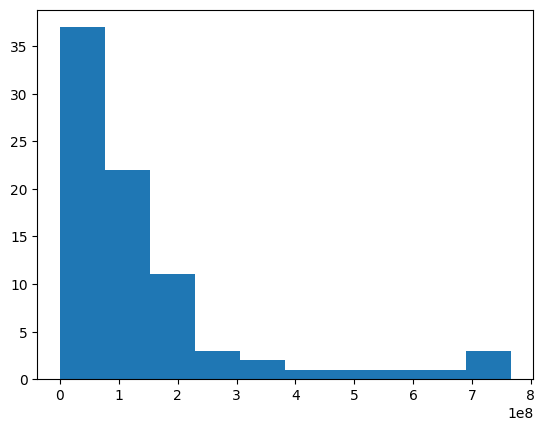

In [38]:
plt.figure()
plt.hist(dfCigar['trade_usd'])
plt.show()